<a href="https://colab.research.google.com/github/ibrahimLpdl/docker_python/blob/master/ml_devoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline

mpg = sns.load_dataset('mpg')
mpg.shape

(398, 9)

In [149]:
mpg = mpg.dropna()

In [150]:
mpg['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [151]:
Y = mpg['cylinders']
X = mpg.drop(['name', 'model_year','cylinders','origin'], axis='columns')
Y

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 392, dtype: int64

In [152]:
Y.shape, X.shape

((392,), (392, 5))

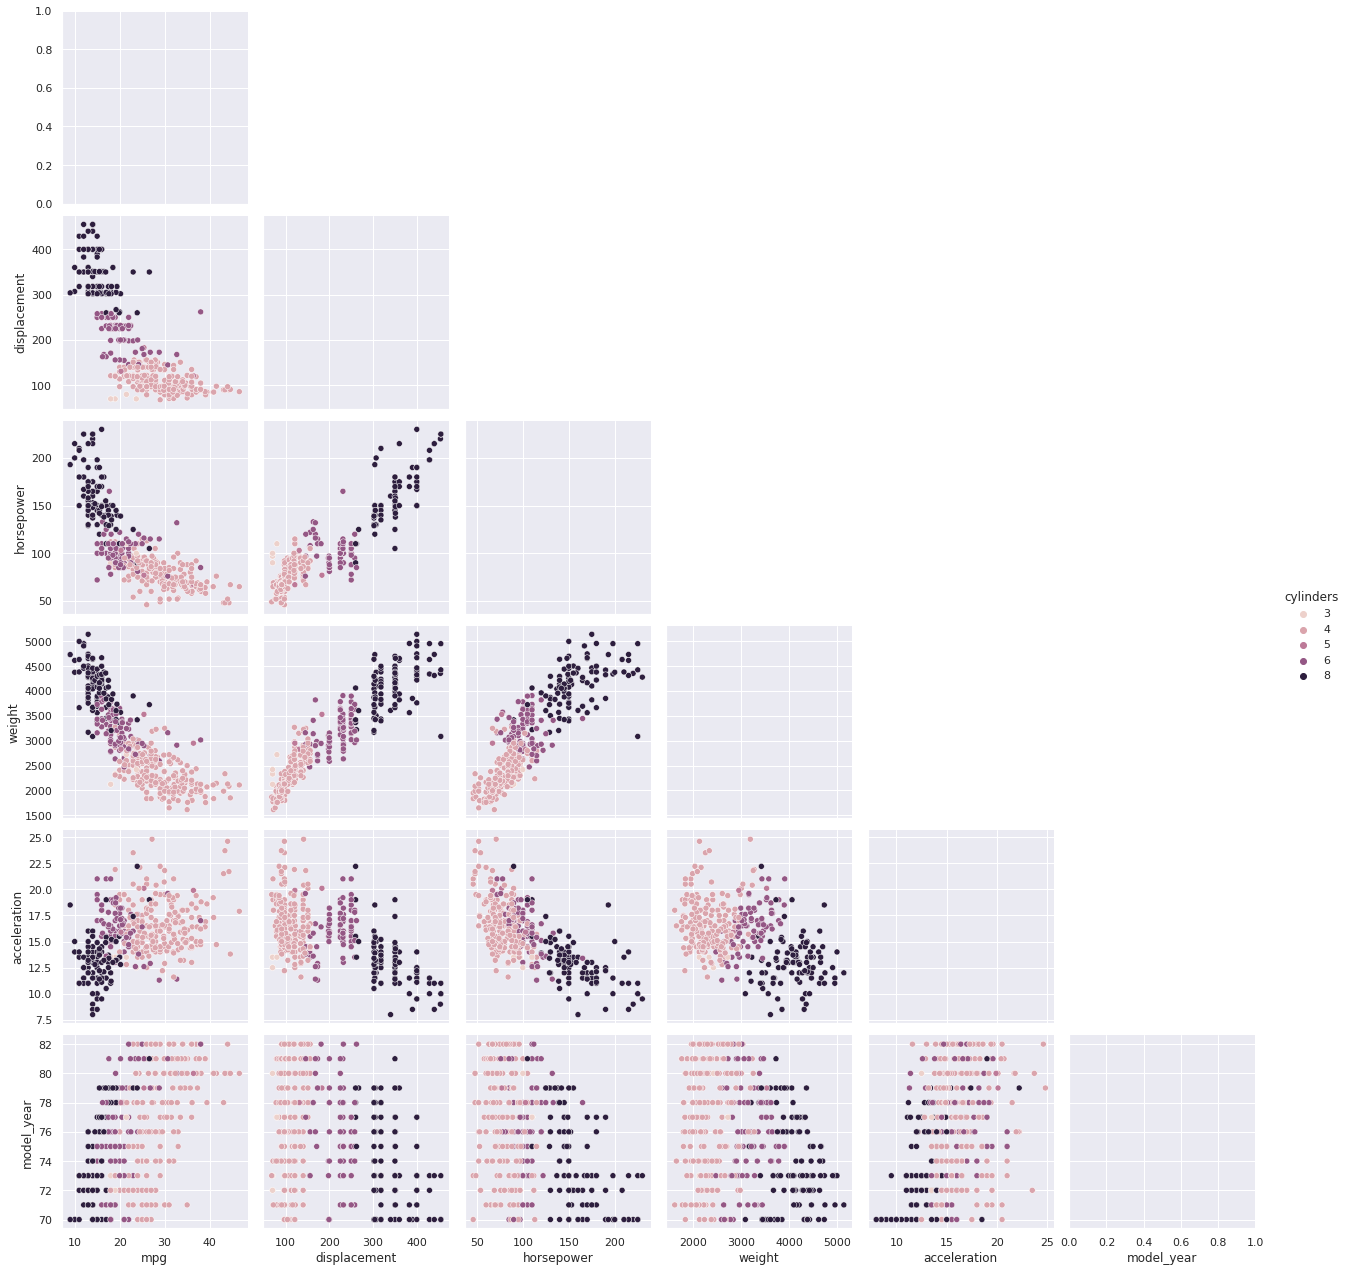

In [134]:
sns.pairplot(mpg, hue="cylinders", diag_kind='Kde', height=3, corner=True )

In [164]:
splits = train_test_split(X,Y,
                          train_size = 0.3,
                          stratify = Y,
                          random_state = 1)
X_tr, X_te, Y_tr, Y_te = splits

In [172]:
knn = KNN(n_neighbors = 4)
#cross_val_score(knn, X_tr,Y_tr, cv=10, scoring='accuracy')
knn.fit(X_tr,Y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [174]:
predicTest = knn.predict(X_te)

In [168]:
def accuracy(preds, target):
    accuracy = (preds == target).sum() / len(Y)
    return accuracy

In [175]:
accuracy(predicTest, Y_te)

0.625

In [189]:
knn.predict_proba(X_te)[0]

array([0., 0., 0., 1., 0.])

0.8909090909090909
0.8836363636363637
0.8909090909090909
0.8727272727272727
0.8727272727272727
0.8654545454545455
0.8654545454545455
0.8654545454545455
0.8618181818181818
0.8618181818181818
0.8472727272727273
0.850909090909091
0.8545454545454545


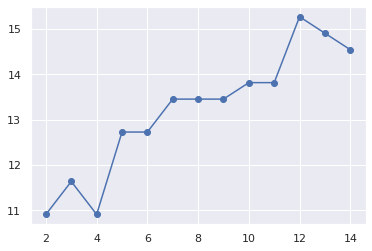

In [165]:
errors = []
for k in range(2,15):
    knn = KNN(n_neighbors = k)
    print(knn.fit(X_tr, Y_tr).score(X_te, Y_te))
    errors.append(100*(1 - knn.fit(X_tr, Y_tr).score(X_te, Y_te)))
plt.plot(range(2,15), errors, 'o-')
plt.show()
#On peut voir que nos 2 meilleur valeur pour la prediction sont 3&4

In [176]:
clf = RandomForestClassifier(max_depth=2, random_state=1)
clf.fit(X_tr,Y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [181]:
predRandom = clf.predict(X_te)

In [191]:
clf.predict_proba(X_te)[0]

array([0.00181789, 0.15705082, 0.0495554 , 0.76249899, 0.0290769 ])

In [182]:
accuracy(predRandom, Y_te)

0.6556122448979592

In [184]:
abc = AdaBoostClassifier().fit(X_tr,Y_tr)

In [186]:
perdAbc = abc.predict(X_te)

In [187]:
accuracy(perdAbc,Y_te)

0.6428571428571429